## NLP Course Work CW-1
Individual Submission 

Name - Kowshik Kesavarapu                   
     

For this project we are asked to work on three components of the chatbot 
1) Intent Classification 
2) Named Entity Recognition 
3) Dialogue flow manager 


### Intent Classifiaction
  <p>intent classifiaction is used for defining what is the reason for the sentance at a higher level , In terms of a chat bot this is used to understand what the user is trying to express and what he might be expecting as the outcome. </p>
  
 <p> Some example sentances and their possible intent are <br>
  Hi , How are you doing  -- > Greeting <br>
  Hello --> Greeting <br>
  Bye , Thanks --> Good bye <br>
  Can i know the price od Pixel 6 --> Price_info <br></p>
  
 
    

For this task i will be using a Data set called as ATIS which is very commonly used for intent classifiaction training (https://www.kaggle.com/datasets/hassanamin/atis-airlinetravelinformationsystem)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('Data/atis_intents_train.csv', names=['target', 'text'])
test_data=pd.read_csv('Data/atis_intents_test.csv', names=['target', 'text'])

### EDA of Intent Data set

Perfroming Exploratory Data Analysis on the ATIS data set 

In [3]:
print('Length of Training Data Set is ',train_data.shape[0])
print('Length of Testing Data Set is ',test_data.shape[0])

Length of Training Data Set is  4834
Length of Testing Data Set is  800


There are 4834 records for Training and 800 for testing 

In [4]:
print('Unique Intents in Training Data set',train_data['target'].nunique())
print('Unique Intents in Testing Data set',test_data['target'].nunique())

Unique Intents in Training Data set 8
Unique Intents in Testing Data set 8


atis_flight            3666
atis_airfare            423
atis_ground_service     255
atis_airline            157
atis_abbreviation       147
atis_aircraft            81
atis_flight_time         54
atis_quantity            51
Name: target, dtype: int64


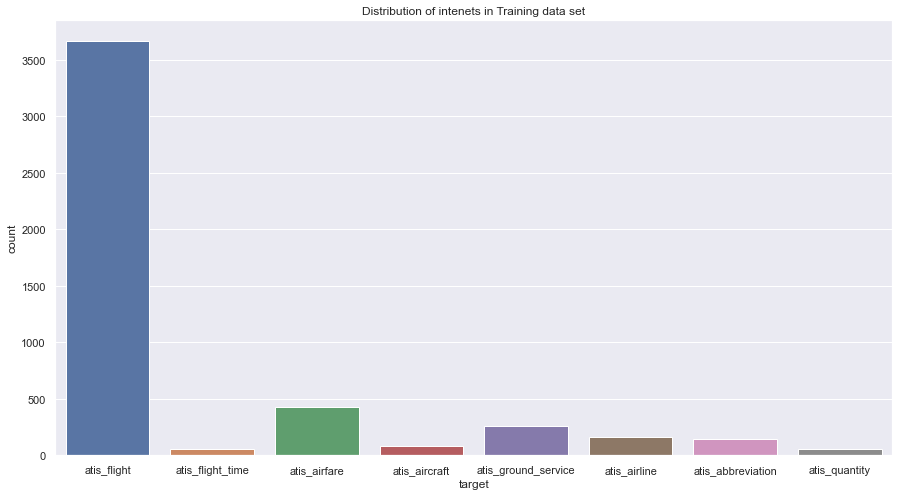

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
import seaborn as sns
sns.set_theme(style="darkgrid")
print(train_data['target'].value_counts())
ax = sns.countplot(x="target", data=train_data).set(title='Distribution of intenets in Training data set')

Here we can observe the spread of different intetns in the Training , We can see atis_flight has the most representation 

atis_flight            632
atis_airfare            48
atis_airline            38
atis_ground_service     36
atis_abbreviation       33
atis_aircraft            9
atis_quantity            3
atis_flight_time         1
Name: target, dtype: int64


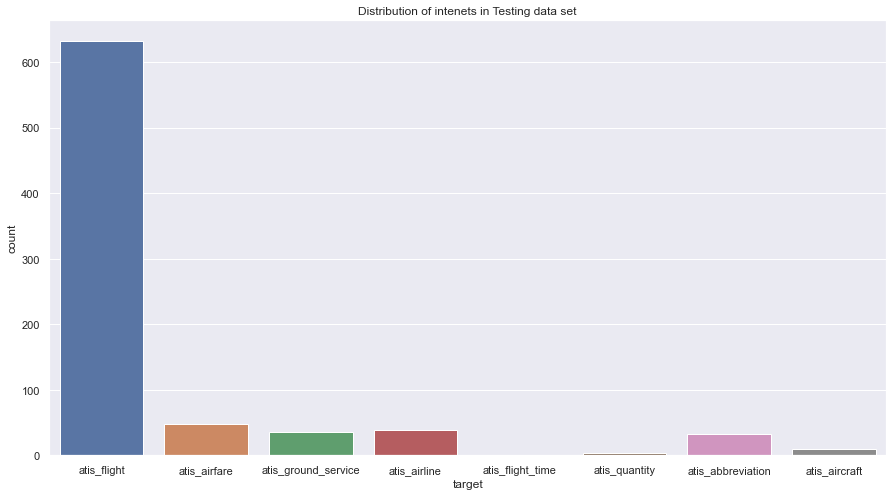

In [6]:
print(test_data['target'].value_counts())
ax = sns.countplot(x="target", data=test_data).set(title='Distribution of intenets in Testing data set')

In testing Data set as well there is same level of the representation

I want to check the average length of sentances for each Intent 

In [7]:
#Returns a df with each intent and avg length
def avg_length(df2):
    cols = df2['target'].unique()
    cols.sort()
    avg=[]
    for j in cols :
        df = df2.loc[df2['target'] == j]
        df['name_length']  = df['text'].str.len()
        avg.append(df['name_length'].sum()/df['name_length'].count())
    avg_listt = list(zip(cols,avg))
    return pd.DataFrame(avg_listt,columns=['target', 'avg_length'])


                target  avg_train   avg_test
0    atis_abbreviation  24.544218  22.545455
1        atis_aircraft  77.506173  57.111111
2         atis_airfare  67.723404  65.479167
3         atis_airline  54.025478  37.342105
4          atis_flight  66.983906  61.493671
5     atis_flight_time  75.555556  64.000000
6  atis_ground_service  56.419608  61.888889
7        atis_quantity  63.000000  58.333333


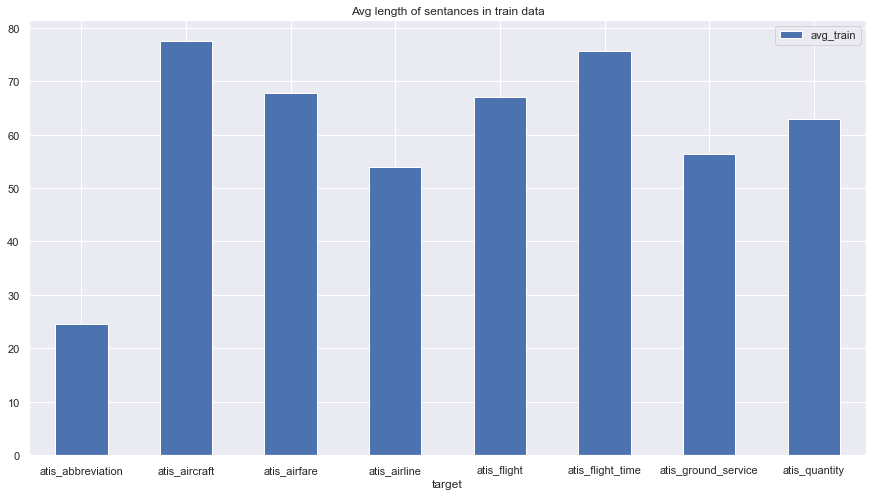

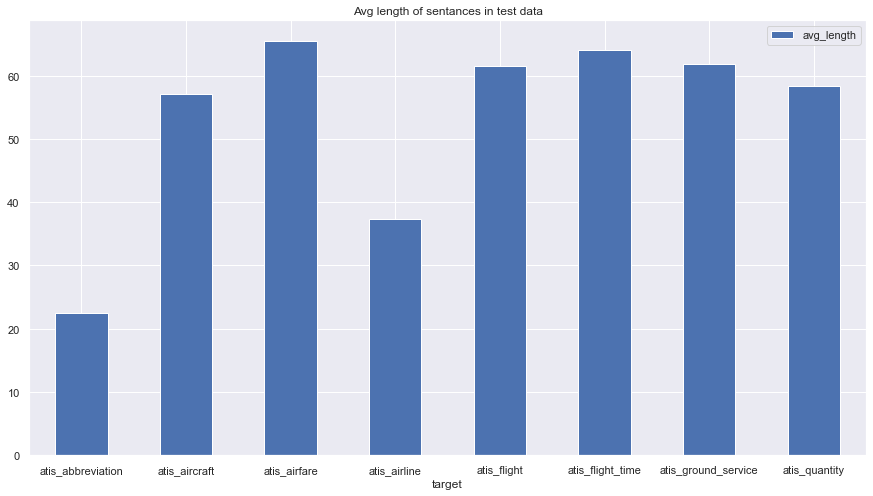

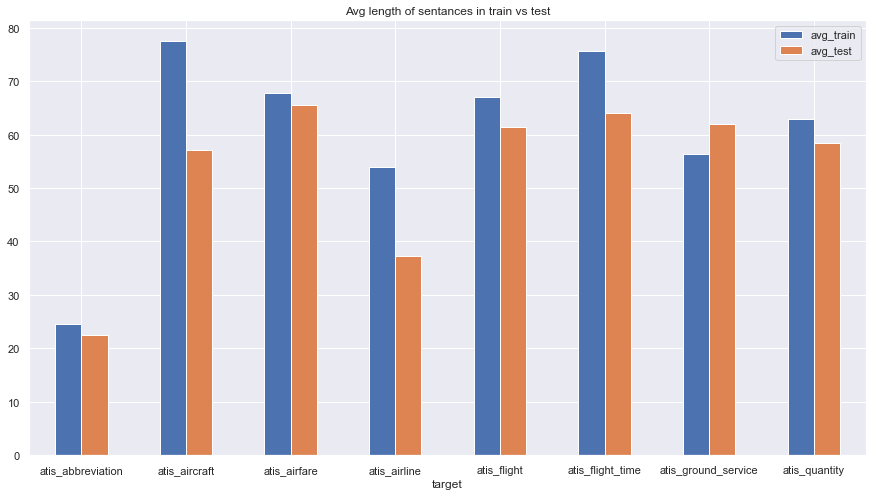

In [8]:
avg_train = avg_length(train_data)
avg_test = avg_length(test_data)
dff = avg_train
dff.rename({'avg_length':"avg_train"},axis=1,inplace = True)
dff['avg_test']=avg_test['avg_length']
print(dff)
ax = avg_train.plot.bar(x=0, y=1, rot=0).set(title='Avg length of sentances in train data')
ax = avg_test.plot.bar(x=0, y=1, rot=0).set(title='Avg length of sentances in test data')
ax = dff.plot.bar(x=0,rot=0).set(title='Avg length of sentances in train vs test')

Here we can see the average length is very similar for both Data sets 

### Data Preprocessing 

For Data Preprocessing we need to convert the words in vectors . For this i am using DictVectorizer which creates numpy array of the sentances 

In [10]:
data = pd.read_csv('Data/atis_intents_train.csv', encoding = "ISO-8859-1",names=['target', 'text'])
data_test = pd.read_csv('Data/atis_intents_test.csv', encoding = "ISO-8859-1",names=['target', 'text'])
data=data.append(data_test)
y = data['target']

In [11]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)#vectorising the data 
X= data.drop('target', axis=1)# dropping the tag data 
X= v.fit_transform(X.to_dict('records'))

In [12]:
classes = np.unique(y)
classes = classes.tolist()
new_classes = classes.copy()
#new_classes.pop()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

### Perceptron

I am using perceptron and using Partial fit to train the perceptron to fit for each different Intent. 

In [14]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(verbose=10,n_jobs=-1,n_iter_no_change=10)
perceptron.partial_fit(X_train, y_train, classes) #Fitting data to each different class of Tags 

-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1


Norm: 16.34, NNZs: 210, Bias: -1.000000, T: 3943, Avg. loss: 0.024093
Total training time: 0.11 seconds.
Norm: 10.82, NNZs: 108, Bias: -1.000000, T: 3943, Avg. loss: 0.013188
Total training time: 0.10 seconds.
Norm: 16.46, NNZs: 253, Bias: -1.000000, T: 3943, Avg. loss: 0.031195
Total training time: 0.11 seconds.
Norm: 8.66, NNZs: 75, Bias: -1.000000, T: 3943, Avg. loss: 0.009384
Total training time: 0.09 seconds.
Norm: 20.42, NNZs: 405, Bias: -1.000000, T: 3943, Avg. loss: 0.050723
Total training time: 0.11 seconds.
Norm: 8.31, NNZs: 66, Bias: -1.000000, T: 3943, Avg. loss: 0.008116
Total training time: 0.11 seconds.
Norm: 25.94, NNZs: 643, Bias: -1.000000, T: 3943, Avg. loss: 0.080142
Total training time: 0.13 seconds.
Norm: 41.92, NNZs: 1646, Bias: 1.000000, T: 3943, Avg. loss: 0.203906
Total training time: 0.14 seconds.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished


Perceptron(n_iter_no_change=10, n_jobs=-1, verbose=10)

                     precision    recall  f1-score   support

  atis_abbreviation       1.00      0.98      0.99       131
      atis_aircraft       1.00      0.89      0.94        55
       atis_airfare       1.00      0.92      0.96       331
       atis_airline       1.00      0.96      0.98       136
        atis_flight       0.91      1.00      0.95      3015
   atis_flight_time       1.00      0.06      0.11        33
atis_ground_service       1.00      0.04      0.08       205
      atis_quantity       0.00      0.00      0.00        37

           accuracy                           0.92      3943
          macro avg       0.86      0.61      0.63      3943
       weighted avg       0.92      0.92      0.89      3943

Accuracy Score on Train data: 0.9223941161552117
Accuracy Score on Test data: 0.7776463630987581


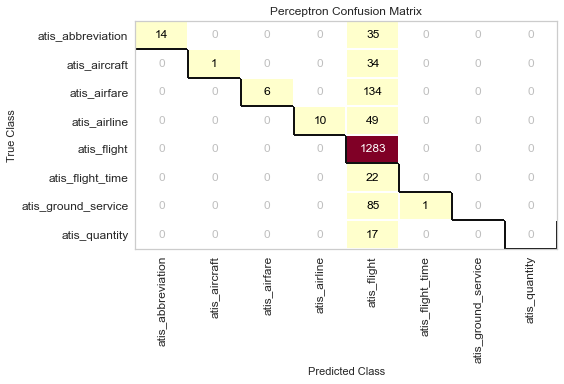

<AxesSubplot:title={'center':'Perceptron Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn.metrics
from yellowbrick.classifier import ConfusionMatrix
classification_per = classification_report(y_pred=perceptron.predict(X_train), y_true=y_train, labels=classes)
per_acc_Train =accuracy_score(y_true=y_train, y_pred=perceptron.predict(X_train))
per_acc_Test =accuracy_score(y_true=y_test, y_pred=perceptron.predict(X_test)) 
print(classification_per)
print('Accuracy Score on Train data:', per_acc_Train)
print('Accuracy Score on Test data:', per_acc_Test)
cm_per= ConfusionMatrix(perceptron, classes=classes)
cm_per.score(X_test, y_test)
cm_per.show()

As we can see here perceptron performed very good by giving us the accuracy as 92% on Train ans only 77% on Test. I want to try several other models as well for Intent

### Linear classifiers with SGD training

                     precision    recall  f1-score   support

  atis_abbreviation       1.00      0.29      0.44        49
      atis_aircraft       0.00      0.00      0.00        35
       atis_airfare       1.00      0.04      0.07       140
       atis_airline       1.00      0.14      0.24        59
        atis_flight       0.77      1.00      0.87      1283
   atis_flight_time       0.00      0.00      0.00        22
atis_ground_service       0.00      0.00      0.00        86
      atis_quantity       0.00      0.00      0.00        17

           accuracy                           0.77      1691
          macro avg       0.47      0.18      0.20      1691
       weighted avg       0.73      0.77      0.69      1691

Accuracy Score on Train data: 0.8879026122241948
Accuracy Score on Test data: 0.7746895328208161


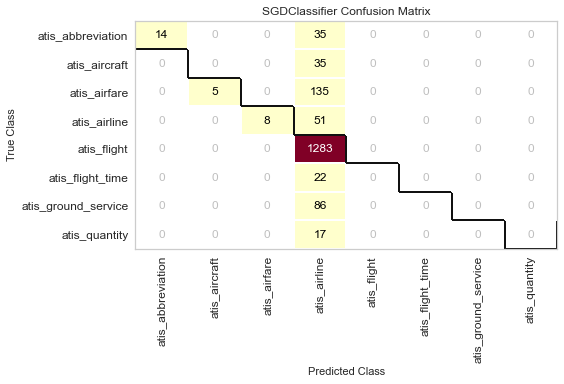

<AxesSubplot:title={'center':'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [16]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.partial_fit(X_train, y_train, classes)
classification_sgd = classification_report(y_pred=sgd_classifier.predict(X_test), y_true=y_test, labels=new_classes)
print(classification_sgd)
sgd_acc_train=accuracy_score(y_true=y_train, y_pred=sgd_classifier.predict(X_train))
sgd_acc_test= accuracy_score(y_true=y_test, y_pred=sgd_classifier.predict(X_test))
print('Accuracy Score on Train data:',sgd_acc_train )
print('Accuracy Score on Test data:', sgd_acc_test)
cm_sgd = ConfusionMatrix(sgd_classifier, classes=classes)
cm_sgd.score(X_test, y_test)
cm_sgd.show()

SGD classigfier is a classification model and it has performed very good in Train data but was not able to do good in Test data.

Classic models like Perceptron and SGD classifier are not well suited for this kind of tasks. Neural network based models such as LSTM and RNN will run good . I will use LSTM for next part of the question 


### Named Entity Recognition 

Named Entity Recognition can be done in several different ways , I mainly want to explore how a prebuilt model like Spacy or NLTK works and how they may differ from trainig our own machine learning model like Perceptron, Multi layer Perceptron , CNN and several other works. 

The main objective for me is to figure out the best approach and also find and explore different models and data sets.

Named Entity can be defined as the word which has significant value . One way describe it is it's "Noun" in a sentance . It can be name of a person , Name of a city , Date , Organization name, Amount and much more.


Some of the most common Named Entities are 


| Entity Type | Description |Example|
| --- | --- |---|
|PERSON|Name of a person (Usually recognized as first name and last name|Kowshik Kesavarapu|
|NORP|Nationalities or Religious/Political Groups|India , UK|
|FAC|Facility Name |IFH , CERN |
|ORG|Organization Name |WHO|
|GPE|Geopolitical Entity|UN|
|LOC|location|Guildford|
|PRODUCT|Product Name |Google Pixel|
|EVENT|Event Name |Google I/O|
|WORK OF ART|Work of art|Picaso|
|LAW|A law that has been published|US Act XXXX|
|LANGUAGE|Language Name |Telugu , English|
|DATE|Date , I dosen't have to be exact date terms like yesterday are also comes under this |21/04/2002 , Tuesday|
|TIME|Time , It also usually considers terms like Afternoon , Evening|2:00PM . Tonight |
|PERCENT|Percentage|100|
|MONEY|Money|$100
|QUANTITY|Measurements of weight or distance|10 Kms|
|CARDINAL|A number, similar to quantity but not a measurement|25 Books (here 25 is Cardinal) |
|ORDINAL|A number, but signifying a relative position such as “first” or “second|First prize |

I want to observe how Prebuilt Models like Spacy , NLP and Text Api works when compared to Classic models like Perceptron , SVM and Advanced Neural network like LSTM 

Pre built Models Used are 

    1. Spacy (https://spacy.io/)
    2. NLTK (https://www.nltk.org/book/ch07.html)
    3. The Text API (https://www.thetextapi.com/)
    
Classic Machine Learning Models 

    1.Perceptron 
    2.SGD classifier 
    3.Naive Bayes 
    4.Passive Agressive Classifier 
    
Advanced neural network 

    1. Bi-Directional LSTM 
    
    
    

I will Try the Pre built models using a simple example statemt ""World Health Organisation announced today that it is spending $100 Million dollars to help with corona virus vacccination is African Countries""


This sentance has 4 Named Entities 
1) World Health Organisation - Organization 
2) African - NORP 
3) $100 Million - Money
4) Today - Date 

## NER Using Spacy

In [17]:
ex = "World Health Organisation announced today that it is spending $100 Million dollars to help with corona virus vacccination is African Countries"

In [18]:
import spacy 
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [19]:
def spacy_ner(sent):
    doc = nlp(sent)

    for ent in doc.ents:
        print(ent.text, ent.label_)

In [20]:
spacy_ner(ex)

World Health Organisation ORG
today DATE
$100 Million dollars MONEY
African NORP


This particular method is very intuitive and relatively easy to implement , We dont need to worry about Tokenization or any other pre processing , This works relatively well. It was able to find all the Named Entities. 


Spacy is particulary designed to work very efficiently and also swiftly. It was trained using tranformers and has support for 66+ languages. The latest build of spacey has accuravy if 89.8% accuracy for NER.


Reference - https://spacy.io/

### NER using NLTK 

For NLTK we need tokenize and also tag POS using the pos_tag in nltk 

These tags are genrated using Penn Treebank Project.


The full forms of these tags are 

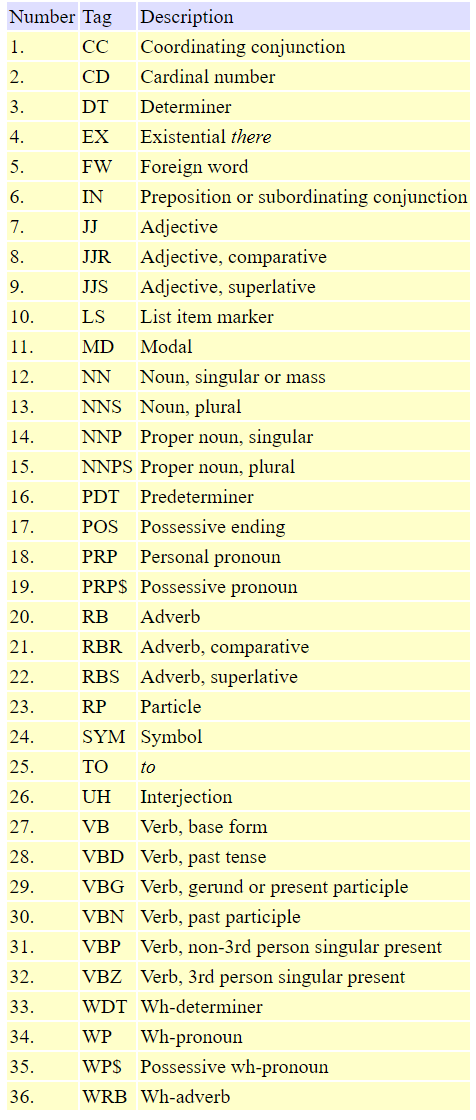


"Reference - https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html"

Once the sentance is Tokenized we can perform NER , I wrote a simple function to do all this when passed with the sentance 

We can perfoem NER and here we can see that 

Here we can see the sentance splitted and POS tagged 

In [21]:
import nltk
tokenized = nltk.word_tokenize(ex)#Tokenizing 
pos_tagged = nltk.pos_tag(tokenized)#Tagging POS 
print(pos_tagged)

[('World', 'NNP'), ('Health', 'NNP'), ('Organisation', 'NNP'), ('announced', 'VBD'), ('today', 'NN'), ('that', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('spending', 'VBG'), ('$', '$'), ('100', 'CD'), ('Million', 'NNP'), ('dollars', 'NNS'), ('to', 'TO'), ('help', 'VB'), ('with', 'IN'), ('corona', 'JJ'), ('virus', 'NN'), ('vacccination', 'NN'), ('is', 'VBZ'), ('African', 'JJ'), ('Countries', 'NNS')]


In [22]:
def ner_nltk(sent):
    tokenized = nltk.word_tokenize(sent)#Tokenizing 
    pos_tagged = nltk.pos_tag(tokenized)#Tagging POS 
    chunks = nltk.ne_chunk(pos_tagged)#Performing NER
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            print(chunk)

In [23]:
ner_nltk(ex)

(GPE African/JJ)


Here we can see that the NLTK havent performed well and was only able to find One entities. Although this seems to be not at all scientific way to compare from my research i found that Spacy often performs well than NLTK as it was trained on much larger data set.

Now there is also a another way of getting the NER this is by using The Text API which is a Text analysis model. 

### NER using Text API

In [24]:
import requests
import json
def text_api(text):
        
        headers = {
            "Content-Type": "application/json",
            "apikey": '6d8398eb-dd38-4e39-b28f-8ce00ff9c4d3'
        }
        body = {
            "text": text
        }
        url = "https://app.thetextapi.com/text/ner"

        response = requests.post(url, headers=headers, json=body)
        ner = json.loads(response.text)["ner"]
        print(ner)

In [25]:
text_api(ex)

[['ORG', 'World Health Organisation'], ['DATE', 'today'], ['MONEY', '$100 Million dollars'], ['ORG', 'African Countries']]


This is another way and for this example it performed relatively well and found all the Named entities 

Now that we covered three different relatively straight forward ways to do NER , Now i am going to experiment with building my own model by training using the dataset found on kaggle, Which contains the data of several thousand sentances along with their POS and NER tags.

### Exploring the Data Set

Data set is from Kaggle (https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus) , It consists of sentances and Parts of Search and their named entitiesa 

In [26]:
data = pd.read_csv('Data/data.csv', encoding = "ISO-8859-1")
data = data[:100000]
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


This data set needs a little cleaning so i am just using ffill to fill the nan with previous found data.

In [27]:
data = data.fillna(method='ffill') 

In [28]:
data[20:30]

,Sentence #,Word,POS,Tag
20,Sentence: 1,from,IN,O
21,Sentence: 1,that,DT,O
22,Sentence: 1,country,NN,O
23,Sentence: 1,.,.,O
24,Sentence: 2,Families,NNS,O
25,Sentence: 2,of,IN,O
26,Sentence: 2,soldiers,NNS,O
27,Sentence: 2,killed,VBN,O
28,Sentence: 2,in,IN,O
29,Sentence: 2,the,DT,O


Here we can observe how the data is distributed . Now i will try to do some exploration of the data 

### EDA

In [29]:
data['Sentence #'].nunique(), data.Word.nunique(), data.Tag.nunique()

(4544, 10922, 17)

Here we can see we have 4544 sentances , 10922 words and 17 tags , Lets see what the tags are 

In [30]:
Ner_Tag = data.groupby('Tag').size().reset_index(name='counts')
print(Ner_Tag)

      Tag  counts
0   B-art      75
1   B-eve      53
2   B-geo    3303
3   B-gpe    1740
4   B-nat      30
5   B-org    1876
6   B-per    1668
7   B-tim    1823
8   I-art      43
9   I-eve      47
10  I-geo     690
11  I-gpe      51
12  I-nat      11
13  I-org    1470
14  I-per    1846
15  I-tim     549
16      O   84725


This data set is not certainly a good data set as there is a possibility of overfitting and underfitting of the data as all the classes are not represented equally.So i will be carefull while building the models.

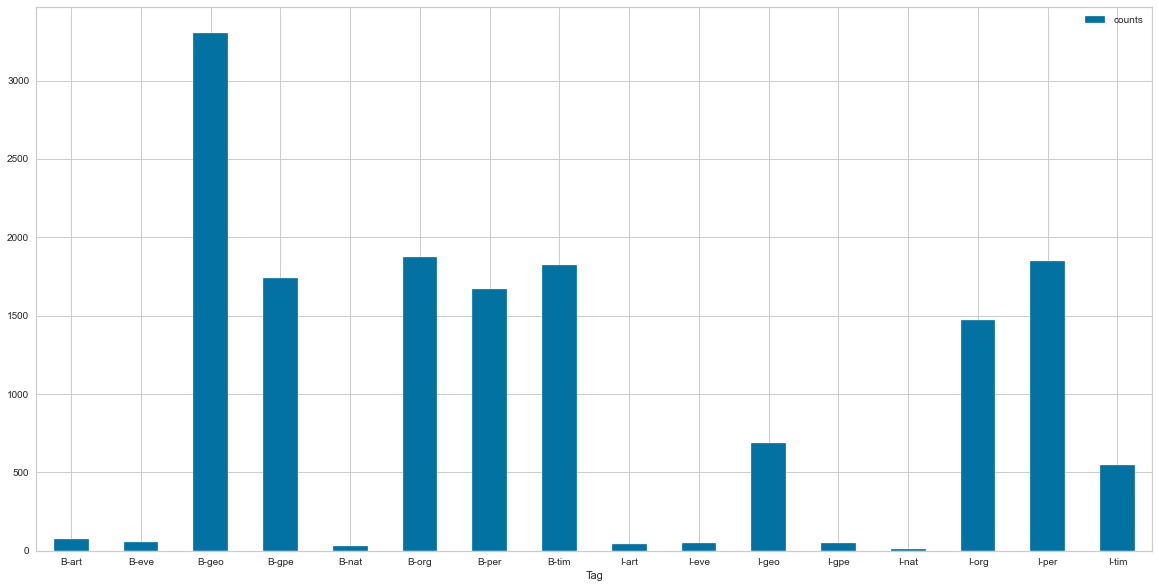

In [31]:
tags1=Ner_Tag[:-1] # removing "O" -other
plt.rcParams["figure.figsize"] = (20,10)
ax = tags1.plot.bar(x='Tag', y='counts', rot=0)

Let's see how is the avg length among the words for each TAG

In [32]:
#Returns a df with each NER tag and avg length
def avg_length(df2):
    cols = df2['Tag'].unique()
    cols.sort()
    avg=[]
    for j in cols :
        df = df2.loc[df2['Tag'] == j]
        df['name_length']  = df['Word'].str.len()
        avg.append(df['name_length'].sum()/df['name_length'].count())
    avg_listt = list(zip(cols,avg))
    return pd.DataFrame(avg_listt,columns=['target', 'avg_length'])


   target  avg_length
0   B-art    6.320000
1   B-eve    5.754717
2   B-geo    6.107175
3   B-gpe    7.096552
4   B-nat    5.433333
5   B-org    5.967484
6   B-per    5.714628
7   B-tim    5.996160
8   I-art    5.790698
9   I-eve    4.574468
10  I-geo    5.666667
11  I-gpe    5.176471
12  I-nat    6.727273
13  I-org    6.538095
14  I-per    6.252438
15  I-tim    3.848816
16      O    4.524627


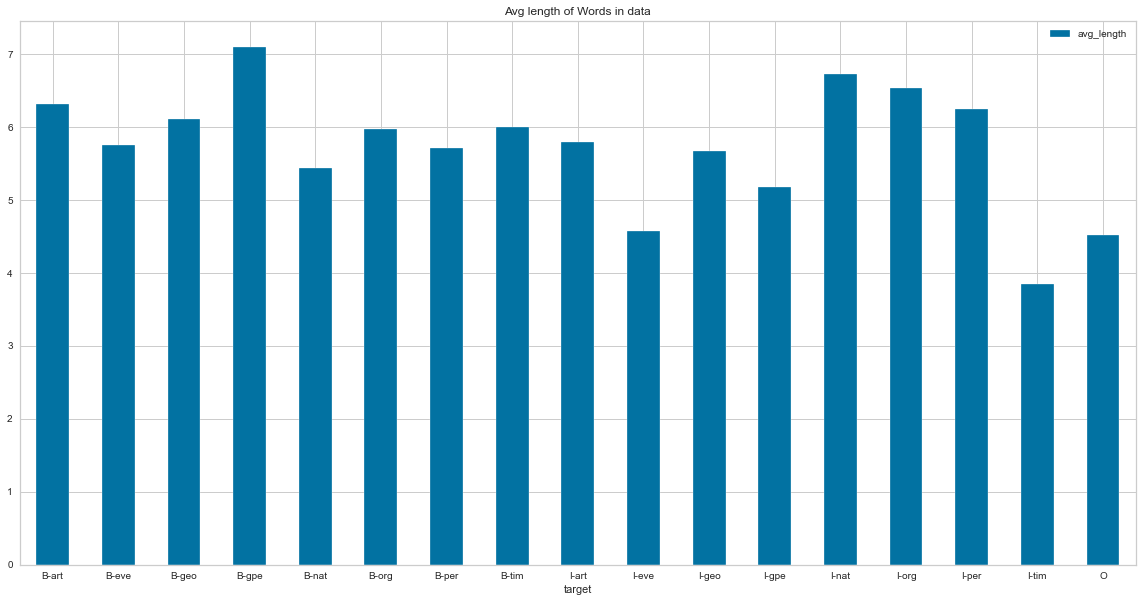

In [33]:
dataaaa=avg_length(data)
print(dataaaa)
ax = dataaaa.plot.bar(x=0, y=1, rot=0).set(title='Avg length of Words in data')

In [34]:
Pos_Tag = data.groupby('POS').size().reset_index(name='counts')
Pos_Tag=Pos_Tag.sort_values(by=['counts'],ascending=False)
Pos_Tag=Pos_Tag.reset_index(drop=True)
print(Pos_Tag)

     POS  counts
0     NN   13975
1    NNP   12526
2     IN   11658
3     DT    9470
4     JJ    7365
5    NNS    7298
6      .    4533
7    VBD    3686
8    VBN    3067
9      ,    3061
10   VBZ    2428
11    CC    2276
12    VB    2276
13    CD    2259
14    TO    2174
15    RB    1991
16   VBG    1826
17   VBP    1533
18   PRP    1289
19   POS    1042
20  PRP$     810
21    MD     658
22    ``     372
23   WDT     352
24   JJR     309
25   JJS     290
26  NNPS     239
27    RP     232
28    WP     232
29   WRB     225
30   RBR     103
31     $      86
32     :      73
33   LRB      72
34   RRB      72
35    EX      60
36     ;      32
37   RBS      24
38   PDT      17
39   WP$       8
40    UH       1


Here we can distibution of different Parts of Speech  

# Model Building 

In [35]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn.metrics
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import LinearSVC
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8)

In [36]:
data = pd.read_csv('Data/data.csv', encoding = "ISO-8859-1")
data = data.fillna(method='ffill')
data = data[:100000]#Using only a part of dataset as using more is creating Memory eroor.
y = data.Tag.values

In [37]:
np.unique(y)

array(['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org', 'B-per',
       'B-tim', 'I-art', 'I-eve', 'I-geo', 'I-gpe', 'I-nat', 'I-org',
       'I-per', 'I-tim', 'O'], dtype=object)

In [38]:
v = DictVectorizer(sparse=False)#vectorising the data 
X= data.drop('Tag', axis=1)# dropping the tag data 
X = v.fit_transform(X.to_dict('records'))

In [39]:
classes = np.unique(y)
classes = classes.tolist()
new_classes = classes.copy()
new_classes.pop()

'O'

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

### Perceptron 

In [41]:
perceptron = Perceptron(verbose=10,n_jobs=-1,n_iter_no_change=10)
perceptron.partial_fit(X_train, y_train, classes) #Fitting data to each different class of Tags 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 11.53, NNZs: 113, Bias: -3.000000, T: 67000, Avg. loss: 0.001060
Total training time: 3.45 seconds.
-- Epoch 1
Norm: 48.83, NNZs: 1578, Bias: -4.000000, T: 67000, Avg. loss: 0.022328
Total training time: 3.48 seconds.
-- Epoch 1
Norm: 68.07, NNZs: 2642, Bias: -4.000000, T: 67000, Avg. loss: 0.041776
Total training time: 3.58 seconds.
-- Epoch 1
Norm: 56.87, NNZs: 2044, Bias: -4.000000, T: 67000, Avg. loss: 0.034970
Total training time: 3.55 seconds.
-- Epoch 1


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 out of  17 | elapsed:    4.0s remaining:   13.1s


Norm: 8.43, NNZs: 57, Bias: -3.000000, T: 67000, Avg. loss: 0.000567
Total training time: 3.71 seconds.
-- Epoch 1
Norm: 13.42, NNZs: 162, Bias: -4.000000, T: 67000, Avg. loss: 0.001642
Total training time: 3.78 seconds.
-- Epoch 1


[Parallel(n_jobs=-1)]: Done   6 out of  17 | elapsed:    4.2s remaining:    7.8s


Norm: 49.90, NNZs: 1337, Bias: -4.000000, T: 67000, Avg. loss: 0.015328
Total training time: 3.90 seconds.
-- Epoch 1
Norm: 44.41, NNZs: 1127, Bias: -4.000000, T: 67000, Avg. loss: 0.017164
Total training time: 3.93 seconds.
-- Epoch 1


[Parallel(n_jobs=-1)]: Done   8 out of  17 | elapsed:    4.4s remaining:    4.9s


Norm: 10.44, NNZs: 106, Bias: -3.000000, T: 67000, Avg. loss: 0.001060
Total training time: 2.12 seconds.
-- Epoch 1
Norm: 11.45, NNZs: 96, Bias: -3.000000, T: 67000, Avg. loss: 0.000776
Total training time: 2.12 seconds.
Norm: 11.00, NNZs: 102, Bias: -3.000000, T: 67000, Avg. loss: 0.001209
Total training time: 2.10 seconds.
Norm: 35.13, NNZs: 803, Bias: -4.000000, T: 67000, Avg. loss: 0.011149
Total training time: 2.16 seconds.


[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    6.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    6.1s remaining:    2.5s


Norm: 6.24, NNZs: 31, Bias: -3.000000, T: 67000, Avg. loss: 0.000209
Total training time: 2.39 seconds.
Norm: 53.57, NNZs: 1703, Bias: -4.000000, T: 67000, Avg. loss: 0.026224
Total training time: 2.32 seconds.
Norm: 30.53, NNZs: 672, Bias: -4.000000, T: 67000, Avg. loss: 0.012030
Total training time: 2.21 seconds.
Norm: 60.35, NNZs: 2091, Bias: -6.000000, T: 67000, Avg. loss: 0.026940
Total training time: 2.29 seconds.


[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    6.5s remaining:    1.3s


Norm: 73.89, NNZs: 2851, Bias: 4.000000, T: 67000, Avg. loss: 0.048866
Total training time: 1.39 seconds.


[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    7.3s finished


Perceptron(n_iter_no_change=10, n_jobs=-1, verbose=10)

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        24
       B-eve       0.11      0.05      0.07        19
       B-geo       0.56      0.81      0.66      1085
       B-gpe       0.92      0.78      0.84       556
       B-nat       1.00      0.17      0.29        12
       B-org       0.39      0.52      0.44       589
       B-per       0.70      0.46      0.56       564
       B-tim       0.91      0.63      0.75       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.67      0.22      0.33        18
       I-geo       0.75      0.42      0.54       230
       I-gpe       1.00      0.07      0.13        14
       I-nat       0.50      0.50      0.50         2
       I-org       0.48      0.50      0.49       445
       I-per       0.83      0.13      0.22       591
       I-tim       0.36      0.18      0.24       194
           O       0.98      1.00      0.99     28034

    accuracy              

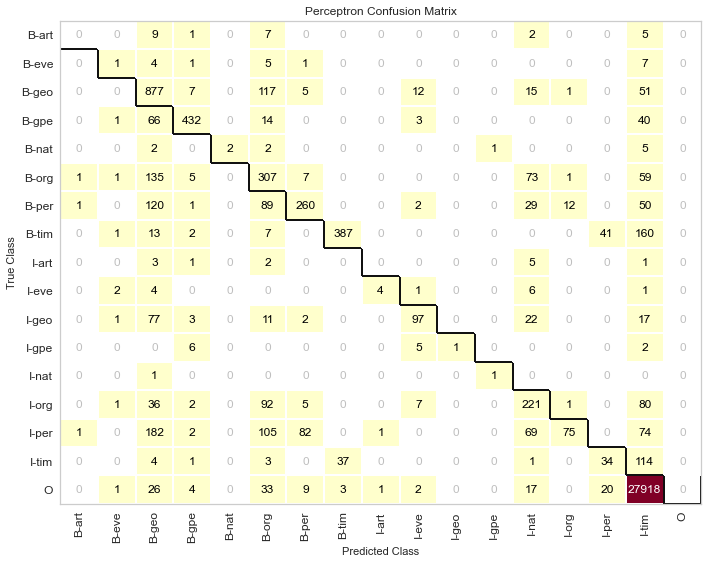

<AxesSubplot:title={'center':'Perceptron Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
classification_per = classification_report(y_pred=perceptron.predict(X_test), y_true=y_test, labels=classes)
per_acc_Train =accuracy_score(y_true=y_train, y_pred=perceptron.predict(X_train))
per_acc_Test =accuracy_score(y_true=y_test, y_pred=perceptron.predict(X_test)) 
print(classification_per)
print('Accuracy Score on Train data:', per_acc_Train)
print('Accuracy Score on Test data:', per_acc_Test)
cm_per= ConfusionMatrix(perceptron, classes=classes)
cm_per.score(X_test, y_test)
cm_per.show()

### Linear classifiers with SGD training

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        24
       B-eve       1.00      0.05      0.10        19
       B-geo       0.78      0.61      0.68      1085
       B-gpe       0.90      0.58      0.70       556
       B-nat       1.00      0.17      0.29        12
       B-org       0.84      0.27      0.40       589
       B-per       0.92      0.37      0.52       564
       B-tim       0.91      0.65      0.76       611
       I-art       0.25      0.08      0.12        12
       I-eve       0.75      0.17      0.27        18
       I-geo       0.54      0.58      0.56       230
       I-gpe       0.00      0.00      0.00        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.37      0.66      0.47       445
       I-per       0.40      0.86      0.55       591
       I-tim       1.00      0.01      0.02       194
           O       0.97      1.00      0.98     28034

    accuracy              

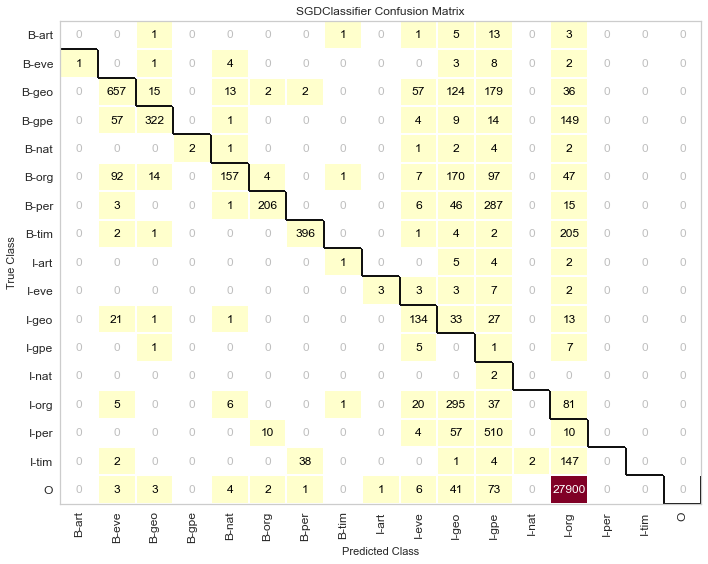

<AxesSubplot:title={'center':'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [43]:
sgd_classifier = SGDClassifier()
sgd_classifier.partial_fit(X_train, y_train, classes)
classification_sgd = classification_report(y_pred=sgd_classifier.predict(X_test), y_true=y_test, labels=classes)
print(classification_sgd)
sgd_acc_train=accuracy_score(y_true=y_train, y_pred=sgd_classifier.predict(X_train))
sgd_acc_test= accuracy_score(y_true=y_test, y_pred=sgd_classifier.predict(X_test))
print('Accuracy Score on Train data:',sgd_acc_train )
print('Accuracy Score on Test data:', sgd_acc_test)
cm_sgd = ConfusionMatrix(sgd_classifier, classes=classes)
cm_sgd.score(X_test, y_test)
cm_sgd.show()

### Naive Bayes classifier for multinomial models

              precision    recall  f1-score   support

       B-art       0.06      0.17      0.09        24
       B-eve       0.33      0.37      0.35        19
       B-geo       0.70      0.63      0.66      1085
       B-gpe       0.70      0.83      0.76       556
       B-nat       0.35      0.50      0.41        12
       B-org       0.41      0.44      0.43       589
       B-per       0.44      0.47      0.46       564
       B-tim       0.56      0.61      0.59       611
       I-art       0.07      0.08      0.08        12
       I-eve       0.46      0.33      0.39        18
       I-geo       0.40      0.52      0.46       230
       I-gpe       0.13      0.14      0.14        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.50      0.51      0.51       445
       I-per       0.53      0.50      0.51       591
       I-tim       0.17      0.27      0.21       194
           O       0.99      0.98      0.98     28034

    accuracy              

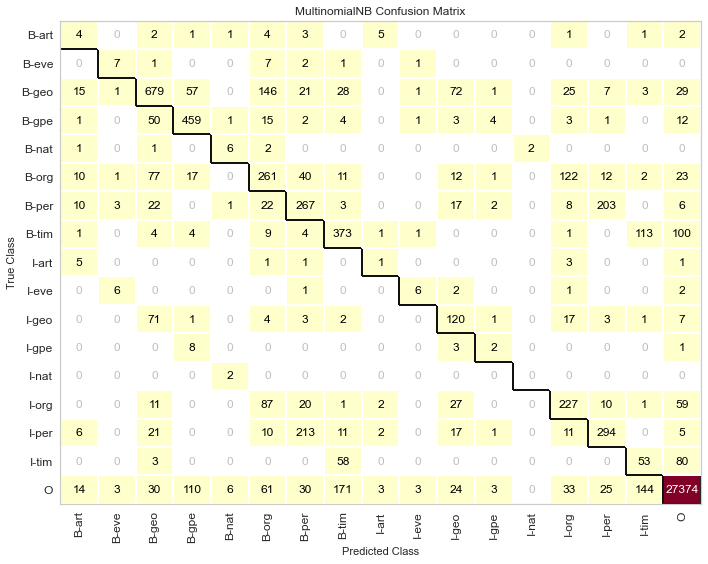

<AxesSubplot:title={'center':'MultinomialNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [44]:
naive_bayes = MultinomialNB(alpha=0.01)
naive_bayes.partial_fit(X_train, y_train, classes)
classification_naive_bayes = classification_report(y_pred=naive_bayes.predict(X_test), y_true=y_test, labels = classes)
print(classification_naive_bayes)
nb_acc_train =accuracy_score(y_true=y_train, y_pred=naive_bayes.predict(X_train))
nb_acc_test = accuracy_score(y_true=y_test, y_pred=naive_bayes.predict(X_test))
print('Accuracy Score on Train data:',nb_acc_train )
print('Accuracy Score on Test data:', nb_acc_test)
cm_nb = ConfusionMatrix(naive_bayes, classes=classes)
cm_nb.score(X_test, y_test)
cm_nb.show()

### Using Passive Aggressive Classifier

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        24
       B-eve       0.00      0.00      0.00        19
       B-geo       0.80      0.49      0.61      1085
       B-gpe       0.89      0.76      0.82       556
       B-nat       0.00      0.00      0.00        12
       B-org       0.65      0.33      0.43       589
       B-per       0.94      0.33      0.49       564
       B-tim       0.91      0.39      0.55       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.60      0.17      0.26        18
       I-geo       0.78      0.33      0.46       230
       I-gpe       0.00      0.00      0.00        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.68      0.33      0.44       445
       I-per       0.83      0.04      0.08       591
       I-tim       0.37      0.24      0.29       194
           O       0.91      1.00      0.96     28034

    accuracy              

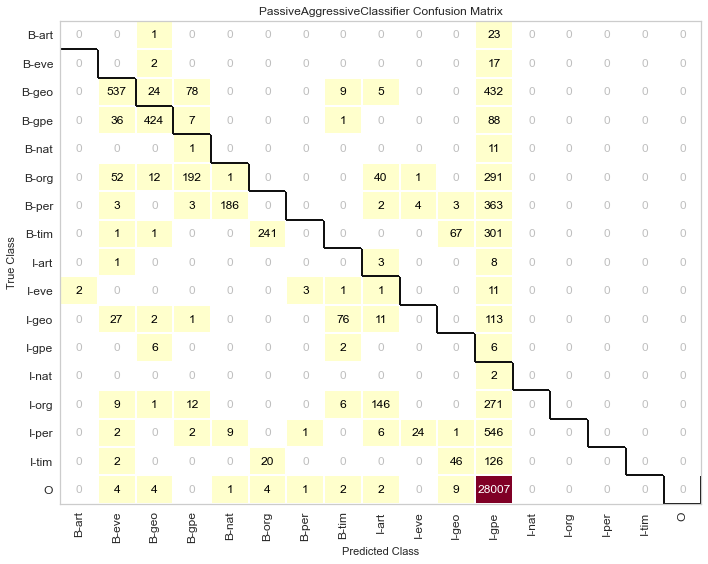

<AxesSubplot:title={'center':'PassiveAggressiveClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
paclass = PassiveAggressiveClassifier(max_iter=1000, random_state=0,n_jobs=-1)
paclass.partial_fit(X_train, y_train, classes)
classification_paclass = classification_report(y_pred=paclass.predict(X_test), y_true=y_test, labels = classes)
print(classification_paclass)
paclass_acc_train =accuracy_score(y_true=y_train, y_pred=paclass.predict(X_train))
paclass_acc_test = accuracy_score(y_true=y_test, y_pred=paclass.predict(X_test))
print('Accuracy Score on Train data:',paclass_acc_train )
print('Accuracy Score on Test data:', paclass_acc_test)
paclass = ConfusionMatrix(paclass, classes=classes)
paclass.score(X_test, y_test)
paclass.show()

### Using Bidirectional LSTM 

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('Data\data.csv', encoding='latin1')
data = data.fillna(method='ffill')
data.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


### Retrieve sentences and corresponding tags

In [48]:
#This function will group and bind all the sentences 
class Sentence_Getter(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                          s['POS'].values.tolist(),
                                                          s['Tag'].values.tolist())]
        self.grouped = self.df.groupby('Sentence #').apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [49]:
decouple = Sentence_Getter(data)
sentences = decouple.sentences

In [50]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

### Define mappings between sentences and tags

In [51]:
words = list(set(data['Word'].values))
words.append('ENDPAD')
num_words = len(words)
tags = list(set(data['Tag'].values))
num_tags = len(tags)
word2idx = {w: i+1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

### Padding input sentences and creating train/test split

In [52]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

maximum_len = 50
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = maximum_len, sequences = X, padding='post', value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = maximum_len, sequences = y, padding = 'post', value = tag2idx['O'])
y = [to_categorical(i, num_classes=num_tags) for i in y]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

### Build and compile a Bidirectional LSTM model

In [54]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [55]:
input_word = Input(shape=(maximum_len, ))
model = Embedding(input_dim = num_words, output_dim = maximum_len, input_length = maximum_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation='softmax'))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

In [58]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=0, mode='max', restore_best_weights=False)
callbacks = [PlotLossesCallback(), early_stopping]

history = model.fit(
    x_train, np.array(y_train),
    validation_split=0.2,
    batch_size = 64,
    epochs = 5,
    verbose = 1,
)

Epoch 1/5
540/540 [==============================] - 74s 120ms/step - loss: 0.2684 - accuracy: 0.9428 - val_loss: 0.1188 - val_accuracy: 0.9670
Epoch 2/5
540/540 [==============================] - 60s 111ms/step - loss: 0.0778 - accuracy: 0.9784 - val_loss: 0.0588 - val_accuracy: 0.9827
Epoch 3/5
540/540 [==============================] - 60s 111ms/step - loss: 0.0473 - accuracy: 0.9861 - val_loss: 0.0513 - val_accuracy: 0.9845
Epoch 4/5
540/540 [==============================] - 60s 111ms/step - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0501 - val_accuracy: 0.9851
Epoch 5/5
540/540 [==============================] - 63s 117ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0493 - val_accuracy: 0.9855


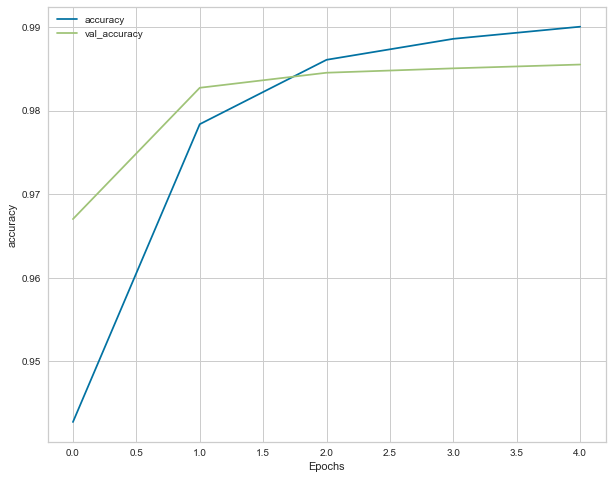

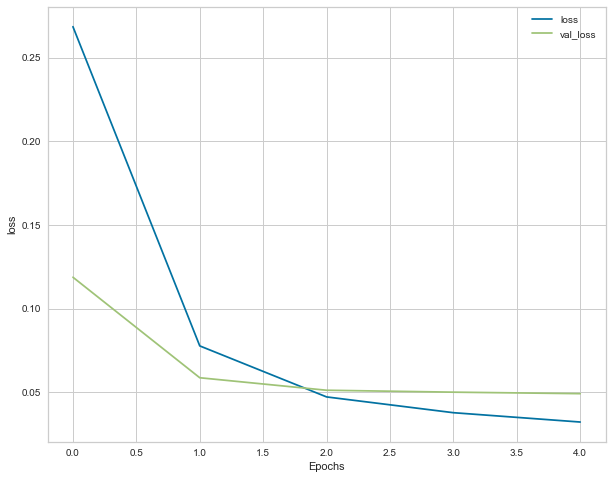

In [59]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

Here we can see the model is able to get to accuracy of more than 98.5 % which is very good

In [60]:
lstm_acc=model.evaluate(x_test, np.array(y_test))
lstm_acc=lstm_acc[1]
print (lstm_acc)

150/150 [==============================] - 3s 22ms/step - loss: 0.0510 - accuracy: 0.9851
0.9851251244544983


In [61]:
print('Accuracy of Perceptron :', round(per_acc_Test*100))
print('Accuracy of SGD :', round(sgd_acc_test*100))
print('Accuracy of Naive Bayes :', round(nb_acc_test*100))
print('Accuracy of Passive-Aggressive :', round(paclass_acc_test*100))
print ("Accuracy of LSTM: " , round(lstm_acc*100))

Accuracy of Perceptron : 93
Accuracy of SGD : 93
Accuracy of Naive Bayes : 91
Accuracy of Passive-Aggressive : 91
Accuracy of LSTM:  99



### Changing Test- Train Split 


In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [63]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=0, mode='max', restore_best_weights=False)
callbacks = [PlotLossesCallback(), early_stopping]

history = model.fit(
    x_train, np.array(y_train),
    validation_split=0.2,
    batch_size = 64,
    epochs = 5,
    verbose = 1,
)

Epoch 1/5
420/420 [==============================] - 51s 121ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0479 - val_accuracy: 0.9860
Epoch 2/5
420/420 [==============================] - 51s 121ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0497 - val_accuracy: 0.9857
Epoch 3/5
420/420 [==============================] - 51s 121ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0522 - val_accuracy: 0.9854
Epoch 4/5
420/420 [==============================] - 51s 121ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 5/5
420/420 [==============================] - 51s 121ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0563 - val_accuracy: 0.9853


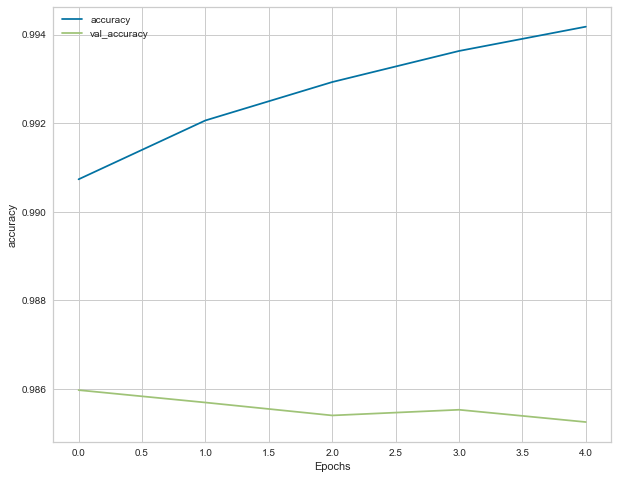

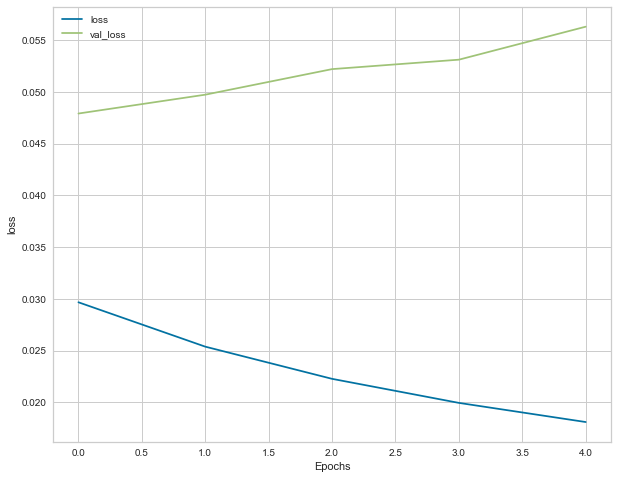

In [64]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

In [65]:
lstm_acc=model.evaluate(x_test, np.array(y_test))
lstm_acc=lstm_acc[1]
print(lstm_acc*100)

450/450 [==============================] - 7s 15ms/step - loss: 0.0423 - accuracy: 0.9883
98.83416891098022


Here i tried to change the Test Train split and was only able to get 0.5% increase in accuracy . Although these gains are small when the accuarcy is in high 90's these small increases are very diffuclt so its a good increse in accuracy 

### Comparing Different Models 

Making a Sentance from the Data set 

In [66]:
def make_sentance (sent) :  # Takes a array of words and returns a setance so can be used to evaluate using SPACY 
    length = len(sent)
    for i in range(length) :
        if i == 0 :
            final = sent[i]
        else :
            final = final +" "+ sent[i]
    return final + " ."


Making a function that compares LSTM with Spacy NER and TEXT-API 

In [67]:
def expermnt (count,nltk_flag,text_flag):
    for z in range(count):
            print("-"*15,z+1,"-"*15)
            i = np.random.randint(0, x_test.shape[0]) # Getting a random sentance number 
            p = model.predict(np.array([x_test[i]])) #Predicting using LSTM 
            p = np.argmax(p, axis=-1) # Conberting from vectoers to tag
            random_sent = []
            r_sent = ''
            y_true = np.argmax(np.array(y_test), axis=-1)[i] 
            print ("Using LSTM")
            print('-'*30)
            print('{:15}{:5}\t {}'.format('Word', 'True', 'Pred'))
            print('-'*30)
            for w, true, pred in zip(x_test[i], y_true, p[0]):
                if (words[w-1] == '.'):
                    break
                else :
                    print('{:15}{}\t{}'.format(words[w-1], tags[true], tags[pred]))
                    random_sent.append(words[w-1])
            r_sent = make_sentance(random_sent)
            print('-'*30)
            print ("Using Spacy")
            print('-'*30)
            spacy_ner(r_sent)
            if (nltk_flag ==1 ) :
                print('-'*30)
                print(" Using NLTK\n")
                print('-'*30)
                ner_nltk(r_sent)
            if (text_flag ==1 ) :
                print('-'*30)
                print("Using text\n") 
                text_api(r_sent)
                print('-'*30)

In [68]:
expermnt(5,1,1)

--------------- 1 ---------------
Using LSTM
------------------------------
Word           True 	 Pred
------------------------------
It             O	O
will           O	O
produce        O	O
plutonium      O	O
once           O	O
it             O	O
is             O	O
completed      O	O
------------------------------
Using Spacy
------------------------------
------------------------------
 Using NLTK

------------------------------
------------------------------
Using text

[]
------------------------------
--------------- 2 ---------------
Using LSTM
------------------------------
Word           True 	 Pred
------------------------------
Five           O	O
Philippine     B-org	B-org
legislators    O	O
accused        O	O
of             O	O
plotting       O	O
a              O	O
coup           O	O
against        O	O
the            O	O
president      O	O
have           O	O
emerged        O	O
from           O	O
the            O	O
Congress       B-org	B-org
building       O	O
where          

### Dialogue Flow Manager 

For Dialogue Flow manager I will be doing a simple heurustic , Which based on the Intent and NER will try to guess the next response. 

I did this as part of the Group Course work and will explain how it works in detail 

note - The required code to train and save is submitted as additional file in supporting Documents 

Here i have two functions 

ner_function - Here spacy is used to create a prebuilt model that identifies tags such as RESTAURANT_NAME , RESTAURANT_TYPE , CAMPUS_NAME , TIME

intent_function - Here a cnn model is used to create a model that predicts intents like "info_timings" , "info_location"  , "info_type"  , "greetings" , "goodbye" 



In [70]:
class ner_function():
    def load_ner():#loads the model
        import spacy
        from spacy.tokens import DocBin
        from tqdm import tqdm
        global nlp_ner
        nlp_ner = spacy.load("Models/model-best")
    def get_ner(sent,tag):
        flag =0
        doc = nlp_ner(sent) 
        for ent in doc.ents:
            if ent.label_ == tag:
                return (ent.text)
                flag =1
        if flag == 0:
            return("NO_ENTITY_FOUND")
    

In [76]:
class intent_function():
    from keras.preprocessing.sequence import pad_sequences
    def load_intent():#loads the model
        import pickle
        import numpy as np
        from keras.models import load_model
        from keras.preprocessing.sequence import pad_sequences
        global model
        model=load_model('Models/models/intents.h5')
        with open('Models/utils/classes.pkl', 'rb') as file:
            global classes
            classes=pickle.load(file)
        with open('Models/utils/tokenizer.pkl', 'rb') as file:
            global tokenizer
            tokenizer=pickle.load(file)
        with open('Models/utils/label_encoder.pkl', 'rb') as file:
            global label_encoder
            label_encoder=pickle.load(file)
    def get_intent(senttt):
        from keras.preprocessing.sequence import pad_sequences
        import numpy as np
        class IntentClassifier:
            from keras.preprocessing.sequence import pad_sequences
            def __init__(self, classes, model, tokenizer, label_encoder):
                self.classes=classes
                self.classifier=model
                self.tokenizer=tokenizer
                self.label_encoder=label_encoder
            def predict_intent(self, text):
                from keras.preprocessing.sequence import pad_sequences
                self.text=[text]
                self.test_keras=self.tokenizer.texts_to_sequences(self.text)
                self.test_keras_sequence=pad_sequences(self.test_keras, maxlen=8, padding='post')
                self.pred=self.classifier.predict(self.test_keras_sequence)
                return label_encoder.inverse_transform(np.argmax(self.pred, 1))[0]
        nlu=IntentClassifier(classes, model, tokenizer, label_encoder)
        return(nlu.predict_intent(senttt))
    

In [73]:
def get_info(rest_name,info_needed):
    import ast
    file = open("Data\dictionary.txt", "r")
    contents = file.read()
    dictionary = ast.literal_eval(contents)
    if rest_name in dictionary.keys():#handling for key error 
        information = dictionary[rest_name][info_needed]
        return information
    else :
        return  'no_info_found'
        


The above function will get the info like opening times and closing types from the dictionary 

This is the main Dialogue flow manager .

The flow can be explained using a flow chart 


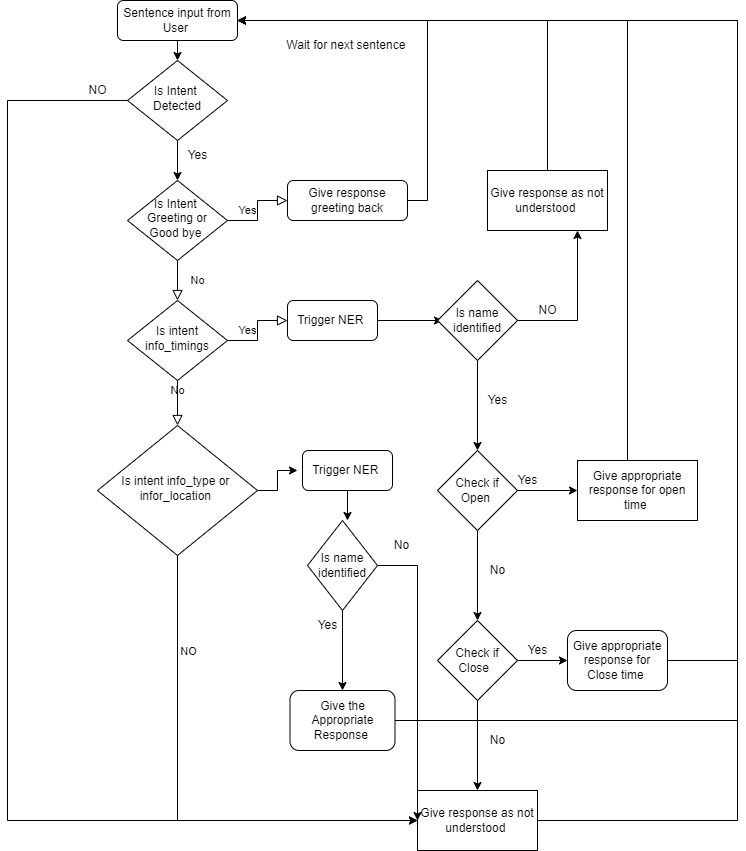

In [74]:
def get_response(intent_detected,sentence):
    import random 
    resp_greet =['Hello', 'Heya','Hi','Hi! How are you doing?','Hey!how are you doing?','Hola','Hello! hope you are doing well','Hello! Whats up?','Hie! how have you been?','Hie!']
    resp_goobye =['Bye Bye!', 'Goodbye','See you!','Bye, it was nice talking to you','Goodbye!, have a nice day','I hope this works','thankyou for having a chat','thank you! I hope this chat helped you']
    resp_timings =['time','timeess']
    resp_type=['typeeee','typessss']
    resp_locc =['locccc','location']
    sorry = "Sorry i dont understand the question i will prepare well next time"
    if intent_detected == 'greeting':
        return (random.choice(resp_greet))
    elif intent_detected == 'goodbye':
        return (random.choice(resp_goobye))
    elif intent_detected == 'info_timings':
        namess = ner_function.get_ner(sentence,'RESTAURANT_NAME')
        if namess == "NO_ENTITY_FOUND" :
            return (sorry)
        elif 'open' in sentence:
            info_needed = get_info(namess,'info_open')
            if info_needed == 'no_info_found':
                return (sorry)
            else :
                ress = namess + ' opening timings are ' + info_needed
                return (ress)
        elif 'close' in sentence:
            info_needed = get_info(namess,'info_close')
            if info_needed == 'no_info_found':
                return (sorry)
            else :
                ress = namess + ' Closing timings are ' + info_needed
                return (ress)
    elif intent_detected == 'info_type':
        namess = ner_function.get_ner(sentence,'RESTAURANT_NAME')
        if namess == "NO_ENTITY_FOUND":
            return (sorry)
        else :
            info_needed = get_info(namess,'type')
            if info_needed == 'no_info_found':
                return (sorry)
            else :
                ress = namess + ' is  ' + info_needed
                return (ress)     
    elif intent_detected == 'info_location':
        namess = ner_function.get_ner(sentence,'RESTAURANT_NAME')
        if namess == "NO_ENTITY_FOUND":
            return (sorry)
        else :
            info_needed = get_info(namess,'location')
            if info_needed == 'no_info_found':
                return (sorry)
            else :
                ress = namess + ' is located  ' + info_needed
                return (ress)   
    

In [78]:
bot_name ='infomania'
intent_function.load_intent() #loading the model 
ner_function.load_ner() #loading model 
print("Hi i am INFORMIA and i will help you find information about restuarants in Univertsity of surrey")
print("Disclaimer :: ---- I am still learning and will get better over time please dont be MAD AT ME") 
print("Let's chat! (type 'quit' to exit)")
bot_name ='infomania'
sent_list=[]
resp_list=[]
intent_list =[]
curr_log=[]
while True:
    # sentence = "do you use credit cards?"
    sentence = input("You: ")
    curr_log.append(('You :' + sentence))
    sent_list.append(sentence)
    if sentence == "quit":
        break
    
    else:
        intent_detected = intent_function.get_intent(sentence)
        intent_list.append(intent_detected)
        response = get_response(intent_detected,sentence)
        resp_list.append(response)
        print(f"{bot_name}:",response )
        curr_log.append(('infomania :' + response))

Hi i am INFORMIA and i will help you find information about restuarants in Univertsity of surrey
Disclaimer :: ---- I am still learning and will get better over time please dont be MAD AT ME
Let's chat! (type 'quit' to exit)


You:  When will hillside open


infomania: hillside opening timings are 11:00


You:  where is starbucks located


infomania: starbucks is located  stag hill


You:  what is starbucks


infomania: Heya


You:  when will pizzaman close


infomania: pizzaman Closing timings are 21:45


You:  quit


Here we can see the Dialogue flow manager is performing relatively well , This can be further increased by training the intent and NER models to be more efficient and functionality can also be incresed in future by adding more intent classes and NER classes 


note - The training and storing of the models and their code is added in the supporting files 

### Final Explanation and Answering the question 

The experiments i have conducted and their outcomes are as follows 

Experiment 1 -
    I tried to understand how different models perform for NER . I have used Prebuilt models like SPACY . NLTK and Text API and classic models like Perceptron , SVM , Passive Agressive Classifier and Naive Bayes and finally LSTM 
    
    From These i understood that NLTK is very basic and it performs well for genralised data but fails in specaliased use cases 
    
    Text API is a model which is very new and being pursued by small team and they are adding more and more functionalties 
    
    Spacy is by far more advanced and powerful as it allows to train with custom tags and also provides a base line empty english model on which we can train our custom models .
    and support of pipelines makes it very powerful and also makes it easy to upgrade the model with new data 
    
    Classic alogorithms like Perceptron , SVM , Passive Agressive Classifier and Naive Bayes are relatively accurtate but they do require lot of training and they dont have the advantages provided by Spacy 
    
    Bi directional LSTM is very accuarate and also gives very accurate results but it also wont be able to identify words that it havent seen before.
    
    After all the experimentation and research i can say for NER Spacy is very useful powerful and also very versatile.
    
    

Experiment 2 - For this i have tried changing the Test train split for LSTM 

    I was able to get the accruacy up by 0.5% using 70-30 split. I have also tried changing the split for classic models but they havent produced any significant change.
    

I tried using different ways of data pre processing and use the same type of preprocessing for LSTM and classic models but it was not able to achieve this 

In order to undertand how different models perform i created a function to experiment and see how they work (expermnt) to compare them 

#### As for Questions 


a. “Can the chatbot components you experimented with fulfil their purpose?”
    
    
    Yes all the Components were able to give good results 
   


b. “What is good enough accuracy?”
    
    
    In Real life situation NER and intent should be identified at very high consistancy. So good enough accuracy would be more than 99% . But this can only be achieved when we have lot of base data and also good understanding of all sitiation  
    
    
c. If any of the models did not perform well, what is needed to improve?

    While testing with data sets like ATIS and NER data set the models performed very well , but when i start building a model to handel a specific task i understood that more data there is better results there will be 
    This is realisation after working in Dialogue flow management and also during group part of the CW

d. If any of the models performed really well, could you make it more efficient and sacrifice some quality?
    
    Spacy is one model that has lot of potential in future i would like to try more using Spacy and pipelines 
    


### Failed Experimentaiton 

In [ ]:
r=0
j=0
for i in Ner_list:
    axs = plt.subplots(5,5)
    df1 = data.loc[data['Tag'] == i]
    df2 = df1.groupby('POS').size().reset_index(name='counts')
    df2=df2.sort_values(by=['counts'],ascending=False)
    df2=df2.reset_index(drop=True)
    df3=df2[1:6]
    #print(df3)
    axs[r,j] = df3.plot.bar(x='POS',y='counts',rot=0).set(title=str(('Ner Tag ')+i))
    j =j+1
    if j >4:
        r =r +1
        j =0
        

In [ ]:
pos = Pos_Tag[1:11]

In [ ]:
pos_list=pos['POS'].unique()
pos_list

In [ ]:
def pos_count(df,pos):

    tags=df['Tag'].unique()
    cols.sort()
    POS=[]
    TAG=[]
    count=[]
    count_listt=[]
    for j in tags :
        df1 = df.loc[df['Tag'] == j]
        for i in pos:
                    df2 = df1.loc[df1['POS'] == i]
                    POS.append(i)
                    TAG.append(j)
                    count.append(len(df2))
    count_listt = list(zip(TAG,POS,count))
    return pd.DataFrame(count_listt,columns=['POS', 'TAG','Count'])

In [ ]:
counttt=pos_count(data,pos_list)

In [ ]:
counttt

In [ ]:
wide = counttt.pivot("POS", "TAG", "Count")
print(wide)
ax = wide.plot.bar(rot=0).set(title='Avg length of Words in data')

Here we can see 